### Exercise 02 | Toy portfolio

Suppose that we have two random variables $X$ and $Y$ which represent the yields of two financial assets. 

We will invest a fraction of our money, say $\omega$, in $X$ and the remaining fraction $(1 - \omega)$ in $Y$.

Our yield will hence be
$$
\omega \cdot X + (1 - \omega) \cdot Y.
$$
Because this is a random quantity, we may want to choose $\omega$ to minimize the variance of our investment. <br>
One can show that the value of $\omega$ minimizing
$$
\mathbb{V}\text{ar}\big( \omega \cdot X + (1 - \omega) \cdot Y \big),
$$
is indeed
$$
%\begin{equation}\label{eq:opt}
\omega^\star = \frac{\sigma^2_Y - \sigma_{X,Y}}{\sigma^2_X + \sigma^2_Y - 2\cdot \sigma_{X,Y}},
%\end{equation}
$$

where $\sigma^2_X = \mathbb{V}\text{ar}(X)$, $\sigma^2_Y = \mathbb{V}\text{ar}(Y)$, $\sigma_{X,Y} = \mathbb{C}\text{ov}(X,Y)$.


Given a random sample $\big\{ (X_1,Y_1), \ldots, (X_n,Y_n)\big\}$ for the returns, we can compute the following plug-in estimator for $\omega^\star$
$$
\widehat{\omega} = \frac{ \widehat{\sigma}^2_Y - \widehat{\sigma}_{X,Y}}{\widehat{\sigma}^2_X + \widehat{\sigma}^2_Y - 2\cdot \widehat{\sigma}_{X,Y}},
$$
Note that even if we knew a parametric form (say bivariate normal) for the joint distribution of $X$ and $Y$, performing formal calculations involving $\widehat{\omega}$ would be difficult, because of the presence of sample estimates (sample variances and covariance) in its numerator and denominator.

As you can imagine, we can pull financial data into `Python` in many different ways
To get the stocks info you have to know (in advance) the symbol associated to that stock (e.g. `Apple Inc.`, `IBM`, etc.) in a particular market (e.g. `NYSE`, `NASDAQ`). You can easily obtain this from portals like [Yahoo! Finance](https://it.finance.yahoo.com/). For example try something like:

In [649]:
# url: https://pypi.org/project/fix-yahoo-finance/

# Install
# pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [650]:
df = yf.download("IBM GOOG AAPL", start="2019-01-01", end="2020-01-01", group_by="ticker") 
df.head() 

[*********************100%***********************]  3 of 3 completed


AAPL                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2018-12-31  39.632500  39.840000  39.119999  39.435001  38.233898  140014000   
2019-01-02  38.722500  39.712502  38.557499  39.480000  38.277527  148158800   
2019-01-03  35.994999  36.430000  35.500000  35.547501  34.464802  365248800   
2019-01-04  36.132500  37.137501  35.950001  37.064999  35.936077  234428400   
2019-01-07  37.174999  37.207500  36.474998  36.982498  35.856094  219111200   

                   IBM                                                 \
                  Open        High         Low       Close  Adj Close   
Date                                                                    
2018-12-31  108.346077  109.321220  107.476097  108.671127  92.693748   
2019-01-02  107.084129  110.879539  106.778206  110.143402  93.949570   
2019-01-03  109.493309  109.827919  107.734222  107.944550  92.073990   
2019-01-04  109.856598  112.323135  109.407265  112.160614  95.670197   
2019-01-07  112.332695  113.604210  111.539200  112.954109  96.347031   

                            GOOG                                         \
             Volume         Open         High          Low        Close   
Date                                                                      
2018-12-31  5212009  1050.959961  1052.699951  1023.590027  1035.609985   
2019-01-02  4434935  1016.570007  1052.319946  1015.710022  1045.849976   
2019-01-03  4546648  1041.000000  1056.979980  1014.070007  1016.059998   
2019-01-04  4683779  1032.589966  1070.839966  1027.417969  1070.709961   
2019-01-07  3923755  1071.500000  1074.000000  1054.760010  1068.390015   

                                  
              Adj Close   Volume  
Date                              
2018-12-31  1035.609985  1493300  
2019-01-02  1045.849976  1532600  
2019-01-03  1016.059998  1841100  
2019-01-04  1070.709961  2093900  
2019-01-07  1068.390015  1981900

In [651]:
# Build some relative performance measure like the ratio Close/Open
AP_ret = df.AAPL.Close/df.AAPL.Open

# Take a look
#AP_ret.plot();

AP_ret.describe()

count    253.000000
mean       1.001843
std        0.010322
min        0.967579
25%        0.995693
50%        1.001823
75%        1.007957
max        1.039548
dtype: float64

<AxesSubplot:xlabel='Date'>

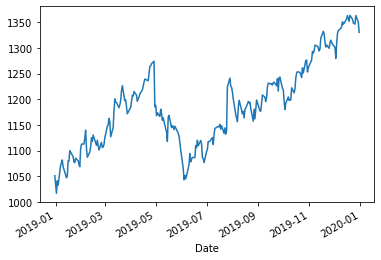

In [652]:
# Build some relative performance measure like the ratio Close/Open
IBM_ret = df.IBM.Close/df.IBM.Open

# Take a look
#IBM_ret.plot();

df.GOOG.Open.plot()

### To Do

1. Prove (analytically) that $\omega^\star$ in fact minimizes the volatility of your investment.

2. Pick two stocks, gather their returns/performance measure in `Python` over a 1 year long period of your choosing, and implement a **nonparametric bootstrap** scheme to get (approximate) estimates for the **standard error** and **MSE** of the plug-in estimator $\widehat{\omega}$.

# Soooo point 1

We start from our variance and we apply the following property:
$$
Var(aX + bY) = a^2 \; \sigma^2_X +  b^2 \; \sigma^2_Y + 2ab \; \sigma_{X,Y}
$$

So we have the following:
$$
Var (\omega \cdot X + (1 - \omega) \cdot Y) =  \omega^2 \; \sigma^2_X + (1-\omega) ^ 2 \; \sigma^2_Y + 2\omega (1- \omega)  \sigma_{X,Y}
$$
Expanding the paretheses we get:
$$
\omega^2 \; \sigma^2_X + \sigma^2_Y + \omega^2 \; \sigma^2_Y -2\omega \sigma^2_Y + 2 \omega \sigma_{X,Y} - 2 \omega^2 \sigma_{X,Y}
$$

Now in order to minimize $\omega$ we have to derivate with respect to $\omega$ and solve the equation $\frac{ d Var(\omega \cdot X + (1 - \omega) \cdot Y)}{d \omega} = 0$

So our taking the derivative wrt to $\omega$ we have:
$$
\frac{ d \; Var(\omega \cdot X + (1 - \omega) \cdot Y)}{d \; \omega} = 2\omega \; \sigma^2_X  +  2\omega \; \sigma^2_Y - 2 \sigma^2_Y + 2 \sigma_{X,Y} - 4 \omega \sigma_{X,Y}
$$

Equating this to 0 and factoring out $\omega$ we have:
$$
\omega (2\sigma^2_X + 2\sigma^2_Y - 4 \sigma_{X,Y}) = 2\sigma^2_X - 2 \sigma_{X,Y}
$$
Finally, solving for $\omega$ we get:
$$
\omega^\star = \frac{2\sigma^2_Y -  2 \sigma_{X,Y}}{2\sigma^2_X + 2\sigma^2_Y - 4 \sigma_{X,Y}}
$$
Simplifying the coefficients:
$$
\omega^\star = \frac{\sigma^2_Y -  \sigma_{X,Y}}{\sigma^2_X + \sigma^2_Y - 2 \sigma_{X,Y}}
$$

# Point 2
2. Pick two stocks, gather their returns/performance measure in `Python` over a 1 year long period of your choosing, and implement a **nonparametric bootstrap** scheme to get (approximate) estimates for the **standard error** and **MSE** of the plug-in estimator $\widehat{\omega}$.

[*********************100%***********************]  2 of 2 completed
253
253


0.8515838537570619

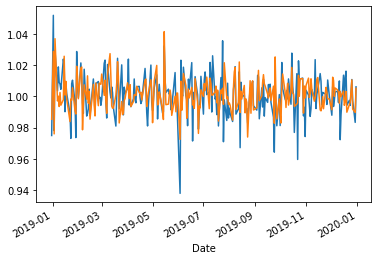

In [653]:
#first things first we clean our data and create our data frame
import numpy as np

df = yf.download("FB, GOOG", start="2019-01-01", end="2020-01-01", group_by="ticker") 

GOOG_ret = df.GOOG.Close/df.GOOG.Open

FB_ret = df["FB"].Close/df["FB"].Open

print(len(GOOG_ret))  
print(len(FB_ret)) # little sanity check to check that they have the same length
FB_ret.plot()
GOOG_ret.plot()

varx, cov  = np.cov(GOOG_ret,FB_ret)[0] # here we unpack the covariance matrix to get both variances and cov
_ , vary = np.cov(GOOG_ret,FB_ret)[1]

w = (vary - cov)/ (varx + vary - 2 *cov)
w #here we calculated omega on our initial data set to compare it with the bootstrapped one


Above we have the graphs of the daily close/open ratio: google in orange and facebook in blue.

0.6438949636490859

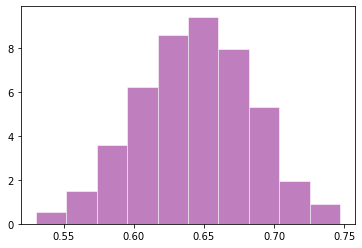

In [672]:
import pandas as pd
# Pre-allocate and initilize
B = 1000
boot_stat = np.zeros(B)

for b in range(B):
    # so here we have to sample from our dataframe
    x_boot = GOOG_ret.sample(n = len(GOOG_ret), replace = True)
    y_boot = FB_ret.sample(n = len(FB_ret), replace = True)

    # Now that we have resampled from our initial dataset we proceed by estimating covariance and the variances.
    
    cov_hat = np.cov(x_boot,y_boot)[0,1]
    
    varx_hat = np.var(x_boot)
    
    vary_hat = np.var(y_boot)
    
    # The last stap is to fill the boot_stat array 
    boot_stat[b] = (vary_hat - cov_hat)/(varx_hat + vary_hat - 2*cov_hat)
    
    # And then iterate

# So now we print the mean and plot the densities
plt.hist(boot_stat, density = 1, facecolor='purple', edgecolor = 'white', alpha=0.5);
boot_stat.mean()

So in this case we can see that the difference between our first $ \omega $ and the bootstrapped one is significant, in other cases the diefference is way less, for example in the case of Google and IBM we have 0.37 and 0.42 with a standard error of 0.048 and a MSE of 0.0057. 

In [655]:
# Here we estimate the bootstrapped standard error as we did in the first exercise
boot_stat.std()


0.03935130040125919

To calculate the MSE we have the following formula: 

$$
MSE(\widehat{\theta}) = \mathbb{E}[(\widehat{\theta} - \theta)^2] = Var(\widehat{\theta}) + (Bias(\widehat{\theta}, \theta))^2
$$

So in our case we calculate the variance of our bootstrapped estimator and for the bias squared we subtract the value of $\omega$ previously computed above and the mean of the our boot_stat.

In [656]:
boot_stat.var() + (w - boot_stat.mean())**2 

0.04410592178100338

Now we should be done but as you suggested me in class something's off... 
We are actually bootstrapping a time series in the same way we bootstrapped iid data and the Close/Open rate isn't probably the most descriptive among performance rates.
So the idea is the following: since here we have data which is correlated in time we can't just ignore this fact and resample as the iid case (or at least we shouldn't).
So reading a bit online we stumbled upon Block Bootstrap, in the following cells we tried to implement a block bootstrap were we sample performance of weeks and we calculated the performance of a week using a sharpe ratio 

So for our sharpe ratio $S(x)$ we have 
$$
S(x) = \frac{r_x - R_f}{StdDev(r_x)}
$$
Where basically we have at the nominator the performance of the investment ($r_x$) minus the performance of a super-low risk activity ($R_f$)over the standard deviation of the returns of that given period ($StdDev(r_x)$) which accounts for the volatility

We calculate $r_x$ as $r_x = \prod_{i=1}^{5} \frac{Open_i}{Close_i} - 1$  where open and close are the weekly open and the weekly close 

For $R_f$ we use the US 10y treasury that is in average around 2% so we will use this value for the calculation of all of our sharpe indexes.

There is a little issue with the way we are calculating the sharpe index: doing it in this way we are ignoring 



In [657]:
# So here we calculate the weekly sharpe of our two stock 
# since we calculate the weekly sharpe I thought it might be better to take a 5Y period so as to increase the number of samples we have

GOOG = yf.download("GOOG", start="2015-01-01", end="2020-01-03", group_by="ticker") 


#So our first issue comes with the length of our dataframe, in order to have evenly distributed GOOG_sharpe (of 5 work days we actually do 5 years and 1 day :))

len(df) # originally 1259 now 1260 :)

weekly_perf = 1
GOOG_sharpe = []
curr_week = []
# debug = []
weekcount = 0
c = 1
# Ok so we want to create two 
for i, row in GOOG.iterrows():
    
    open = row["Open"]
    close = row["Close"]
    
    daily_perf = close/open
    weekly_perf *= (daily_perf)
    curr_week.append(daily_perf)
    
    if c % 5 == 0: # so every 5 iterations we calculate the weekly sharpe 
        sharpe = (weekly_perf - 1 - 0.02) / np.array(curr_week).std() 
        
        GOOG_sharpe.append(sharpe)
        weekly_perf = 1
        # debug.append(curr_week)
        # if weekcount == 24:
        #     print(i)
        weekcount += 1 
        curr_week = []
        
    c += 1


    



[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

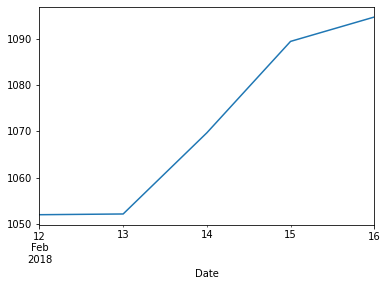

In [658]:
# By reverse engineering (I left the code commented out mostly i got the index of the max and then printed the week
# our sharpe indexes this was the one with the highest sharpe index a good week indeed
GOOGfeb = yf.download("GOOG", start="2018-02-11", end="2018-02-20", group_by="ticker") 
GOOGfeb.Close.plot()

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

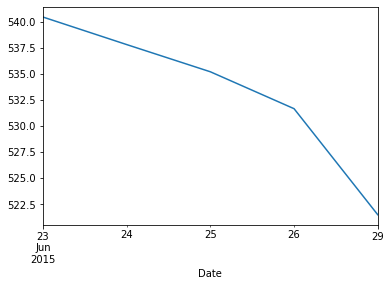

In [659]:
# Whereas the lowest was apparently on the five days before 2015-06-30 so doing as above we can verify 
# if our results made sense

GOOGfeb = yf.download("GOOG", start="2015-06-24", end="2015-06-30", group_by="ticker") 
GOOGfeb.Close.plot()

# Now that we are confident enough with our results we can procede to create the same index for facebook

In [660]:
FB = yf.download("FB", start="2015-01-01", end="2020-01-03", group_by="ticker") 


# So our first issue comes with the length of our dataframe, in order to have evenly distributed FB_sharpe 
# (of 5 work days we actually do 5 years and 1 day :))

len(df) # originally 1259 now 1260 :)
weekly_perf = 1
FB_sharpe = []
curr_week = []
c = 1
# Ok so we want to create two 
for i, row in FB.iterrows():
    
    open = row["Open"]
    close = row["Close"]
    
    daily_perf = close/open
    weekly_perf *=  (daily_perf)
    curr_week.append(daily_perf)
    #print(f'{weekly_perf} at day {c} ')
    if c % 5 == 0:
        sharpe = (weekly_perf - 1 - 0.02) / np.array(curr_week).std() # manca da sottrarre 
        # print(weekly_perf - 1)
        FB_sharpe.append(sharpe)
        weekly_perf = 1
        curr_week = []
    c += 1



[*********************100%***********************]  1 of 1 completed


Ok so now we can procede with the bootstrap

In [661]:
covi = np.cov(GOOG_sharpe,FB_sharpe)[0,1]
varxi = np.var(GOOG_sharpe)

varyi = np.var(FB_sharpe)
omega = (varyi - covi)/(varxi + varyi - 2*covi)
w


0.8515838537570619

The bootstrap mean is: 0.38938139026938073 
the standard error is 0.050125593960204266 and the MSE is 0.01051673598888746


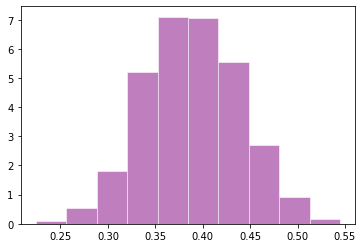

In [662]:
#We have to convert our good ol python lists to dataframes in order to sample
import matplotlib.pyplot as plt
G_sharpes = pd.Series(GOOG_sharpe)

F_sharpes = pd.Series(FB_sharpe)

B = 1000
boot_stat = np.zeros(B)


for b in range(B):
    # so here we have to sample from our dataframe
    G_boot = G_sharpes.sample(n = len(G_sharpes), replace = True)

    F_boot = F_sharpes.sample(n = len(F_sharpes), replace = True)

    
    cov_hat = np.cov(G_boot,F_boot)[0,1]
    
    varx_hat = np.var(G_boot)
    
    vary_hat = np.var(F_boot)
    boot_stat[b] = (vary_hat - cov_hat)/(varx_hat + vary_hat - 2*cov_hat)

plt.hist(boot_stat, density = 1, facecolor='purple', edgecolor = 'white', alpha=0.5);

print(f"The bootstrap mean is: {boot_stat.mean()} \nthe standard error is {boot_stat.std()} and the MSE is {boot_stat.var() + (omega - boot_stat.mean())**2 }")


In [663]:
#Another intersting analysis could be to see how much this changes increasing the block sizes for this purpose let me define some functions
#in order to avoid repeating the same code over and over

def create_sharpes(index, blocksize):
    df = yf.download(index, start="2015-01-01", end="2020-01-03", group_by="ticker") 

    weekly_perf = 1
    sharpes = []
    curr_week = []
    c = 1
    
    for i, row in df.iterrows():
        
        open = row["Open"]
        close = row["Close"]
        
        daily_perf = close/open
        weekly_perf *=  (daily_perf)
        curr_week.append(daily_perf)
        
        if c % blocksize == 0:
            sharpe = (weekly_perf - 1 - 0.02) / np.array(curr_week).std()
            sharpes.append(sharpe)
            weekly_perf = 1
            curr_week = []
        c += 1
    return sharpes

def bootstrap(arr1,arr2,len_B):
    sharpes1 = pd.Series(arr1)

    sharpes2 = pd.Series(arr2)

    B = len_B
    boot_stat = np.zeros(B)


    for b in range(B):
        # so here we have to sample from our dataframe
        G_boot = sharpes1.sample(n = len(sharpes1), replace = True)

        F_boot = sharpes2.sample(n = len(sharpes2), replace = True)

        
        cov_hat = np.cov(G_boot,F_boot)[0,1]
        
        varx_hat = np.var(G_boot)
        
        vary_hat = np.var(F_boot)
        boot_stat[b] = (vary_hat - cov_hat)/(varx_hat + vary_hat - 2*cov_hat)
    return boot_stat


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
The bootstrap mean is: 0.5058940144670722 
the standard error is 0.055290655971443406 and the MSE is 0.0031513902127562722


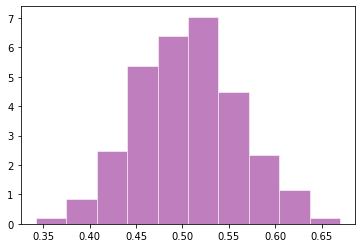

In [673]:
# So let's try again our analysis with a block size of 15

G15_sharpe = create_sharpes("GOOG" , 15)
F15_sharpe = create_sharpes("FB" , 15)

boot = bootstrap(G15_sharpe, F15_sharpe,1000)

cov = np.cov(G15_sharpe,F15_sharpe)[0,1]
        
varG = np.var(G15_sharpe)

varF = np.var(F15_sharpe)
omega = (varF - cov)/(varG + varF - 2*cov)
        
plt.hist(boot, density = 1, facecolor='purple', edgecolor = 'white', alpha=0.5);
print(f"The bootstrap mean is: {boot.mean()} \nthe standard error is {boot.std()} and the MSE is {boot.var() + (omega - boot.mean())**2 }")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
The bootstrap mean is: 0.5174243568103666 
the standard error is 0.09121432738009885 and the MSE is 0.008359163335946836


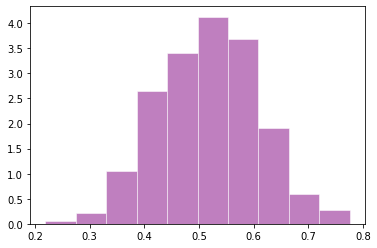

In [665]:
# So let's try again our analysis with a block size of 30

G30_sharpe = create_sharpes("GOOG" , 30)
F30_sharpe = create_sharpes("FB" , 30)

boot = bootstrap(G30_sharpe, F30_sharpe,1000)

cov = np.cov(G30_sharpe,F30_sharpe)[0,1]
        
varG = np.var(G30_sharpe)

varF = np.var(F30_sharpe)
omega = (varF - cov)/(varG + varF - 2*cov)
        

plt.hist(boot, density = 1, facecolor='purple', edgecolor = 'white', alpha=0.5);
print(f"The bootstrap mean is: {boot.mean()} \nthe standard error is {boot.std()} and the MSE is {boot.var() + (omega - boot.mean())**2 }")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
The bootstrap mean is: 0.4969167847930487 
the standard error is 0.17654111575203055 and the MSE is 0.2028977476439826


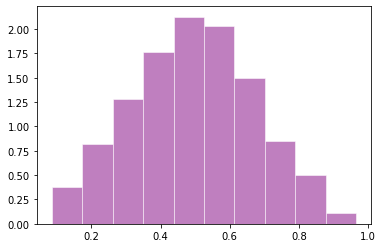

In [674]:

G3_sharpe = create_sharpes("GOOG" , 3)
F3_sharpe = create_sharpes("FB" , 3)

boot = bootstrap(G3_sharpe, G3_sharpe,1000)

cov = np.cov(G3_sharpe,F3_sharpe)[0,1]
        
varG = np.var(G3_sharpe)

varF = np.var(F3_sharpe)
omega = (varF - cov)/(varG + varF - 2*cov)
        


plt.hist(boot, density = 1, facecolor='purple', edgecolor = 'white', alpha=0.5)
print(f"The bootstrap mean is: {boot.mean()} \nthe standard error is {boot.std()} and the MSE is {boot.var() + (omega - boot.mean())**2 }")

So one issue with the code above is how the performance is calculated is that using the product of the daily performances as a weekly index of performance we are actually losing out on the possible difference of the closing price of one day and opening price of the day after so in the following cell we implemented another version with the rates of closing of one day with the before. As written in the first comment.
In this way we have that the product:
$$
\prod_{i=2}^{5} \frac{c_i}{c_{i-1}} = \frac{c_5}{c_1} 
$$
Where basically i = 1 is monday and i = 5 is friday. 
So we basically had the strong assumption, in the previous "create_sharpes", of selling every day and buying again the next day.

In [667]:
def create_sharpes_close(index, blocksize):
    df = yf.download(index, start="2015-01-01", end="2020-01-03", group_by="ticker") 

    #mart/lun * merc/mart * giov/merc * ven/giov 
    weekly_perf = 1
    sharpes = []
    curr_week = []
    c = 1
    close1 = 0
    add = 0
    for i, row in df.iterrows():
        close = row["Close"]
        
        if c == 1 or just_app:
            
            oldclose = close
            c += 1
            just_app = False
            
            continue
        
        perf = close/oldclose
        weekly_perf *= perf
        oldclose = close
        curr_week.append(perf)
        
        
        if c % blocksize == 0:
            sharpe = (weekly_perf - 1 - 0.02) / np.array(curr_week).std()
            sharpes.append(sharpe)
            add += 1
            weekly_perf = 1
            curr_week = []
            
            just_app = True
            
        c += 1
    return sharpes

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
The bootstrap mean is: 0.5002044548454071 
the standard error is 0.0793904797106597 and the MSE is 0.18076948881143234


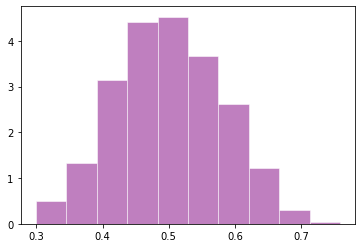

In [675]:

G5_sharpe = create_sharpes_close("GOOG" , 5)
F5_sharpe = create_sharpes_close("FB" , 5)


boot = bootstrap(G5_sharpe, F5_sharpe,1000)

plt.hist(boot, density = 1, facecolor='purple', edgecolor = 'white', alpha=0.5)
print(f"The bootstrap mean is: {boot.mean()} \nthe standard error is {boot.std()} and the MSE is {boot.var() + (omega - boot.mean())**2 }")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
The bootstrap mean is: 0.6210436756495181 
the standard error is 0.17943063239656207 and the MSE is 0.32221127104507474


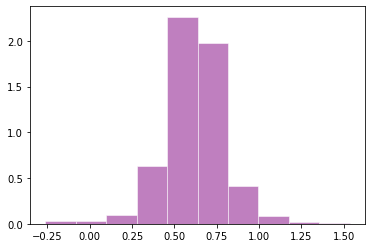

In [669]:
# I just wanted to see what would happen if we only had 10 blocks, probably as we have less and less blocks our bootstrapped \omega will continue 
# to increase and the errors keep getting bigger
G126_sharpe = create_sharpes_close("GOOG" ,126)
F126_sharpe = create_sharpes_close("FB" , 126)


boot = bootstrap(G126_sharpe, F126_sharpe,1000)

plt.hist(boot, density = 1, facecolor='purple', edgecolor = 'white', alpha=0.5)
print(f"The bootstrap mean is: {boot.mean()} \nthe standard error is {boot.std()} and the MSE is {boot.var() + (omega - boot.mean())**2 }")

The result is pretty much consistent among the sharpe examples but is quite far from the first time we calculated $\omega$ and still far but surely closer to the first bootstrapped $\omega$. Still this result is probably more reliable since we are bootstrapping the time series in blocks taking into account the temporal dependencies of time series by bootstrapping in blocks. Sorry if this addendum was way bigger than it should have been but I got a bit carried away.